In [22]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

import statsmodels.api as sm

# 상관관계 분석 

In [23]:
# 3개월 주식 수익 (2019-08 ~ 2021-06)
AltriaR = pd.read_csv('./3M_return/3M_return/MOreturn.csv')
CocaR = pd.read_csv('./3M_return/3M_return/KOreturn.csv')
FacebookR = pd.read_csv('./3M_return/3M_return/FBreturn.csv')
NikeR = pd.read_csv("./3M_return/3M_return/NKEreturn.csv")
WalmartR = pd.read_csv("./3M_return/3M_return/WMTreturn.csv")
AmazonR = pd.read_csv("./3M_return/3M_return/AMZNreturn.csv")
SpotifyR = pd.read_csv("./3M_return/3M_return/SPOTreturn.csv")
MicrosoftR = pd.read_csv("./3M_return/3M_return/MSFTreturn.csv")
PfizerR = pd.read_csv("./3M_return/3M_return/PFEreturn.csv")
TeslaR = pd.read_csv("./3M_return/3M_return/TSLAreturn.csv")
AMDR = pd.read_csv("./3M_return/3M_return/AMDreturn.csv")

# 주식 기사 점수 (2019-08 ~ 2021-08)
Altria = pd.read_csv('mean/ALTRIA_mean.csv')
Coca = pd.read_csv('mean/Coca-cola_mean.csv')
Facebook = pd.read_csv('mean/Facebook_mean.csv')
Nike = pd.read_csv("mean/NIKE_mean.csv")
Walmart = pd.read_csv("mean/Walmart_mean.csv")
Amazon = pd.read_csv("mean/Amazon_mean.csv")
Spotify = pd.read_csv("mean/Spotify_mean.csv")
Microsoft = pd.read_csv("mean/Microsoft_mean.csv")
Pfizer = pd.read_csv("mean/PFIZER_mean.csv")
Tesla = pd.read_csv("mean/TESLA_mean.csv")
AMD = pd.read_csv("mean/AMD_mean.csv")

#SPY (2019-08-01 ~ 2021-06-01)
SPY = pd.read_csv('3month_spy.csv')

#ETF (2019-08-01 ~ 2021-06-01)
TeslaETF = pd.read_csv('./ETF/IYK.csv')
MicrosoftETF = pd.read_csv('./ETF/IXN.csv')
AmazonETF = pd.read_csv('./ETF/IBUY.csv')
SpotifyETF = pd.read_csv('./ETF/PBS.csv')
PfizerETF = pd.read_csv('./ETF/PJP.csv')
AMDETF = pd.read_csv('./ETF/SOXX.csv')
WalmartETF = pd.read_csv('./ETF/RTH.csv')
AltriaETF = pd.read_csv('./ETF/MJ.csv')
CocaETF = pd.read_csv('./ETF/FTXG.csv')
NikeETF = pd.read_csv('./ETF/IYK.csv')
FacebookETF = pd.read_csv('./ETF/XLC.csv')

In [24]:
ETF =[AltriaETF, AMDETF, CocaETF, FacebookETF, NikeETF, WalmartETF, TeslaETF, AmazonETF, SpotifyETF, PfizerETF, MicrosoftETF]

In [25]:
for i in ETF:
    i['Date'] = pd.to_datetime(i['Date'])
    i['month'] = i['Date'].dt.strftime('%Y-%m')
    i.rename(columns={'per3month': 'ETF3month'}, inplace=True)

In [26]:
FacebookETF.head(3)

,Date,XLC,3_month,ETF3month,month
0,2019-08-01,49.858418,49.817242,-0.000826,2019-08
1,2019-09-01,48.631104,51.726479,0.063650,2019-09
2,2019-10-01,48.621288,52.779514,0.085523,2019-10


In [27]:
SPY['date'] = pd.to_datetime(SPY['date'])
SPY['month'] = SPY['date'].dt.strftime('%Y-%m')

In [28]:
SPY.head(3)

,date,Adj Close,3_month,per3month,month
0,2019-08-01,286.2878,293.3212,0.024568,2019-08
1,2019-09-01,281.4944,303.9388,0.079733,2019-09
2,2019-10-01,286.9776,312.7633,0.089853,2019-10


In [29]:
stocks = [Altria, AMD, Coca, Facebook, Nike, Walmart, Tesla, Amazon, Spotify, Pfizer, Microsoft]

In [30]:
for i in stocks:
    i.drop(i.tail(2).index,
        inplace = True)

In [10]:
Altria

,YM,sent
0,2019-08,-0.017886
1,2019-09,-0.022222
2,2019-10,-0.022305
3,2019-11,0.000000
4,2019-12,0.000000
5,2020-01,0.000000
6,2020-02,0.002028
7,2020-03,0.000000
8,2020-04,0.000000
9,2020-05,0.000000


In [154]:
#stats.pearsonr(Altria['sent'], AltriaR['yield'] - AltriaETF['per3month'])

## Linear Regression 

In [31]:
import statsmodels.api as sm

### Altria

In [32]:
AltriaNew = pd.concat([Altria.sent, AltriaR['yield'], SPY.per3month, AltriaETF.ETF3month], axis=1)
AltriaNew['momentum'] = AltriaNew['yield'].shift()

AltriaResult = AltriaNew.dropna()
AltriaResult

,sent,yield,per3month,ETF3month,momentum
1,-0.022222,0.158980,0.079733,-0.272494,-0.029412
2,-0.022305,0.240680,0.089853,-0.165427,0.158980
3,0.000000,0.078903,0.065852,-0.130318,0.240680
4,0.000000,-0.174156,-0.052813,-0.178346,0.078903
5,0.000000,-0.205106,-0.194266,-0.321103,-0.174156
6,0.002028,-0.152783,-0.091585,-0.263135,-0.205106
7,0.000000,-0.007604,0.033516,-0.000305,-0.152783
8,0.000000,0.036788,0.201649,0.140907,-0.007604
9,0.000000,0.070914,0.129046,0.095272,0.036788
10,0.000000,0.144148,0.152919,-0.063042,0.070914


In [33]:
AltriaResult['constant'] = 1

<ipython-input-33-0eb28ab8cda0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AltriaResult['constant'] = 1


In [34]:
reg = sm.OLS(AltriaResult['yield'], AltriaResult[['constant','sent','per3month','momentum','ETF3month']]).fit()

In [35]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  yield   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     10.29
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           0.000202
Time:                        16:12:10   Log-Likelihood:                 27.448
No. Observations:                  22   AIC:                            -44.90
Df Residuals:                      17   BIC:                            -39.44
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant      -0.0165      0.021     -0.771      0.451      -0.062       0.029
sent          -3.5093      1.529     -2.295      0.035      -6.736      -0.283
per3month      0.5720      0.257      2.224      0.040       0.029       1.114
momentum       0.2806      0.151      1.858      0.081      -0.038       0.599
ETF3month      0.1077      0.063      1.697      0.108      -0.026       0.242
==============================================================================
Omnibus:                        0.657   Durbin-Watson:                   1.842
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.094
Skew:                           0.147   Prob(JB):                        0.954
Kurtosis:                       3.128   Cond. No.                         91.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

<AxesSubplot:xlabel='momentum', ylabel='yield'>

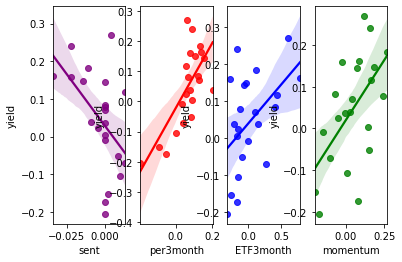

In [36]:
plt.subplot(1, 4, 1)
sns.regplot('sent', 'yield', AltriaResult, color='purple')
plt.subplot(1, 4, 2)
sns.regplot('per3month', 'yield', AltriaResult, color='red')
plt.subplot(1, 4, 3)
sns.regplot('ETF3month', 'yield', AltriaResult, color='blue')
plt.subplot(1, 4, 4)
sns.regplot('momentum', 'yield', AltriaResult, color='green')

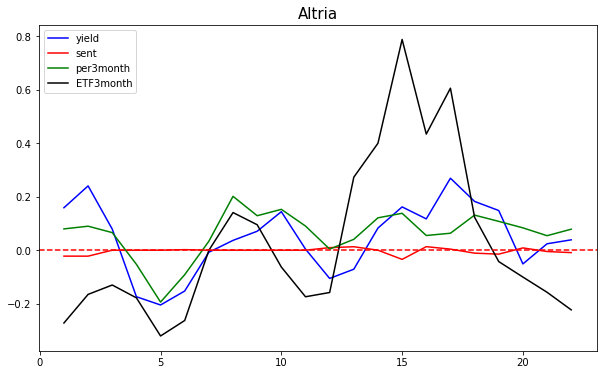

In [38]:
fig, ax = plt.subplots(figsize=(10,6))

ax.set_title('Altria', fontsize=15)

ax.plot(AltriaResult['yield'],color='blue')
ax.plot(AltriaResult['sent'],color='red')
ax.plot(AltriaResult['per3month'],color='green')
ax.plot(AltriaResult['ETF3month'],color='black')

ax.axhline(0,0,1,color='red',linestyle='--')

# ax.xticks()

ax.legend(['yield','sent','per3month','ETF3month'],loc='upper left')

plt.show()

### AMD

In [116]:
AMDNew = pd.concat([AMD.sent, AMDR['yield'], SPY.per3month, AMDETF.ETF3month], axis=1)
AMDNew['momentum'] = AMDNew['yield'].shift()
AMDResult = AMDNew.dropna()
AMDResult['constant'] = 1

reg = sm.OLS(AMDResult['yield'], AMDResult[['constant','sent','per3month','momentum','ETF3month']]).fit()
reg.summary()

# res = smf.ols(formula='yield ~ sent + per3month + momentum + ETF3month', data=AMDResult).fit()
# print(res.summary())

<ipython-input-116-fad63e070de2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AMDResult['constant'] = 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  yield   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     4.354
Date:                Fri, 24 Sep 2021   Prob (F-statistic):             0.0132
Time:                        15:11:02   Log-Likelihood:                 9.0587
No. Observations:                  22   AIC:                            -8.117
Df Residuals:                      17   BIC:                            -2.662
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant       0.0702      0.078      0.899      0.381      -0.094       0.235
sent          -5.1966      4.102     -1.267      0.222     -13.852       3.459
per3month      0.6755      0.912      0.741      0.469      -1.249       2.599
momentum       0.5519      0.178      3.098      0.007       0.176       0.928
ETF3month      0.1502      0.703      0.214      0.833      -1.332       1.633
==============================================================================
Omnibus:                        2.448   Durbin-Watson:                   1.688
Prob(Omnibus):                  0.294   Jarque-Bera (JB):                1.121
Skew:                          -0.509   Prob(JB):                        0.571
Kurtosis:                       3.432   Cond. No.                         108.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

<AxesSubplot:xlabel='momentum', ylabel='yield'>

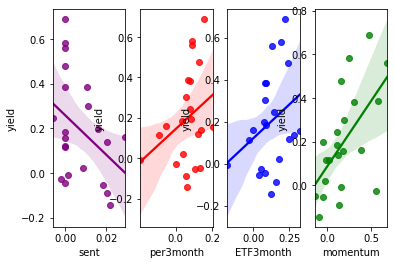

In [64]:
plt.subplot(1, 4, 1)
sns.regplot('sent', 'yield', AMDResult, color='purple')
plt.subplot(1, 4, 2)
sns.regplot('per3month', 'yield', AMDResult, color='red')
plt.subplot(1, 4, 3)
sns.regplot('ETF3month', 'yield', AMDResult, color='blue')
plt.subplot(1, 4, 4)
sns.regplot('momentum', 'yield', AMDResult, color='green')

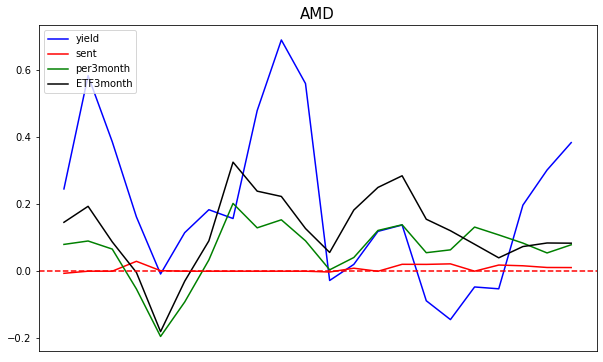

In [71]:
fig, ax = plt.subplots(figsize=(10,6))

ax.set_title('AMD', fontsize=15)

ax.plot(AMDResult['yield'],color='blue')
ax.plot(AMDResult['sent'],color='red')
ax.plot(AMDResult['per3month'],color='green')
ax.plot(AMDResult['ETF3month'],color='black')

ax.axhline(0,0,1,color='red',linestyle='--')

plt.xticks([],[])

ax.legend(['yield','sent','per3month','ETF3month'],loc='upper left')

plt.show()

### Coca

In [117]:
CocaNew = pd.concat([Coca.sent, CocaR['yield'], SPY.per3month, CocaETF.ETF3month], axis=1)
CocaNew['momentum'] = CocaNew['yield'].shift()
CocaResult = CocaNew.dropna()
CocaResult['constant'] = 1

reg = sm.OLS(CocaResult['yield'], CocaResult[['constant','sent','per3month','momentum','ETF3month']]).fit()
reg.summary()

<ipython-input-117-4ddd32c5e421>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CocaResult['constant'] = 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  yield   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     12.08
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           7.84e-05
Time:                        15:11:31   Log-Likelihood:                 36.385
No. Observations:                  22   AIC:                            -62.77
Df Residuals:                      17   BIC:                            -57.32
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant      -0.0344      0.016     -2.145      0.047      -0.068      -0.001
sent           0.3609      1.148      0.314      0.757      -2.061       2.782
per3month      0.5707      0.238      2.398      0.028       0.069       1.073
momentum       0.4792      0.126      3.809      0.001       0.214       0.745
ETF3month      0.1184      0.211      0.561      0.582      -0.327       0.564
==============================================================================
Omnibus:                        0.081   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.113
Skew:                          -0.094   Prob(JB):                        0.945
Kurtosis:                       2.704   Cond. No.                         103.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

<AxesSubplot:xlabel='momentum', ylabel='yield'>

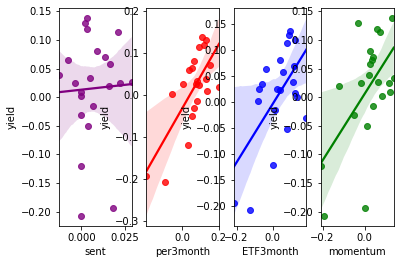

In [65]:
plt.subplot(1, 4, 1)
sns.regplot('sent', 'yield', CocaResult, color='purple')
plt.subplot(1, 4, 2)
sns.regplot('per3month', 'yield', CocaResult, color='red')
plt.subplot(1, 4, 3)
sns.regplot('ETF3month', 'yield', CocaResult, color='blue')
plt.subplot(1, 4, 4)
sns.regplot('momentum', 'yield', CocaResult, color='green')

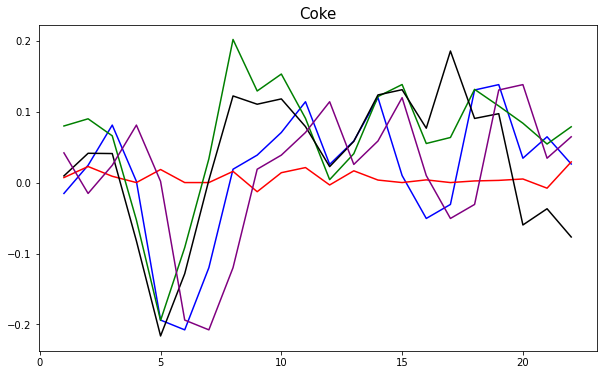

In [193]:
fig, ax = plt.subplots(figsize=(10,6))

ax.set_title('Coke', fontsize=15)
# ax.set_ylabel('ETF')
# ax.set_xlabel("Date Time")

ax.plot(CocaResult['yield'],color='blue')
ax.plot(CocaResult['sent'],color='red')
ax.plot(CocaResult['per3month'],color='green')
ax.plot(CocaResult['ETF3month'],color='black')
ax.plot(CocaResult['momentum'],color='purple')


# ax.legend(['ETF ('+etf+')'],loc='upper left')

plt.show()

### Spotify

In [118]:
SpotifyNew = pd.concat([Spotify.sent, SpotifyR['yield'], SPY.per3month, SpotifyETF.ETF3month], axis=1)
SpotifyNew['momentum'] = SpotifyNew['yield'].shift()
SpotifyResult = SpotifyNew.dropna()
SpotifyResult['constant'] = 1

reg = sm.OLS(SpotifyResult['yield'], SpotifyResult[['constant','sent','per3month','momentum','ETF3month']]).fit()
reg.summary()

<ipython-input-118-91f7f8d66462>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SpotifyResult['constant'] = 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  yield   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     6.715
Date:                Fri, 24 Sep 2021   Prob (F-statistic):            0.00197
Time:                        15:12:16   Log-Likelihood:                 4.1675
No. Observations:                  22   AIC:                             1.665
Df Residuals:                      17   BIC:                             7.120
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant       0.0723      0.069      1.048      0.309      -0.073       0.218
sent         -11.1021      4.694     -2.365      0.030     -21.005      -1.199
per3month      0.3602      1.107      0.325      0.749      -1.976       2.696
momentum       0.4273      0.174      2.455      0.025       0.060       0.795
ETF3month      0.6995      0.658      1.063      0.303      -0.689       2.088
==============================================================================
Omnibus:                        6.102   Durbin-Watson:                   1.797
Prob(Omnibus):                  0.047   Jarque-Bera (JB):                3.826
Skew:                           0.885   Prob(JB):                        0.148
Kurtosis:                       4.020   Cond. No.                         98.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

<AxesSubplot:xlabel='momentum', ylabel='yield'>

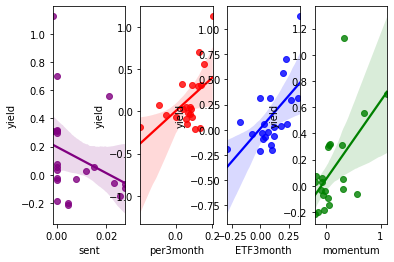

In [119]:
plt.subplot(1, 4, 1)
sns.regplot('sent', 'yield', SpotifyResult, color='purple')
plt.subplot(1, 4, 2)
sns.regplot('per3month', 'yield', SpotifyResult, color='red')
plt.subplot(1, 4, 3)
sns.regplot('ETF3month', 'yield', SpotifyResult, color='blue')
plt.subplot(1, 4, 4)
sns.regplot('momentum', 'yield', SpotifyResult, color='green')

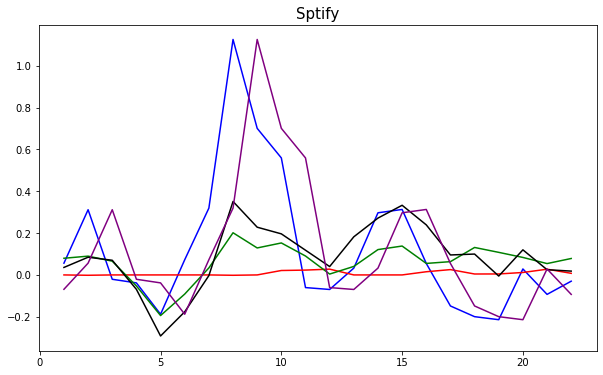

In [120]:
fig, ax = plt.subplots(figsize=(10,6))

ax.set_title('Sptify', fontsize=15)
# ax.set_ylabel('ETF')
# ax.set_xlabel("Date Time")

ax.plot(SpotifyResult['yield'],color='blue')
ax.plot(SpotifyResult['sent'],color='red')
ax.plot(SpotifyResult['per3month'],color='green')
ax.plot(SpotifyResult['ETF3month'],color='black')
ax.plot(SpotifyResult['momentum'],color='purple')


# ax.legend(['ETF ('+etf+')'],loc='upper left')

plt.show()

### Microsoft

In [121]:
MicrosoftNew = pd.concat([Microsoft.sent, MicrosoftR['yield'], SPY.per3month, MicrosoftETF.ETF3month], axis=1)
MicrosoftNew['momentum'] = MicrosoftNew['yield'].shift()
MicrosoftResult = MicrosoftNew.dropna()
MicrosoftResult['constant'] = 1

reg = sm.OLS(MicrosoftResult['yield'], MicrosoftResult[['constant','sent','per3month','momentum','ETF3month']]).fit()
reg.summary()

<ipython-input-121-cdf55e12d048>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MicrosoftResult['constant'] = 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  yield   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     9.225
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           0.000375
Time:                        15:12:51   Log-Likelihood:                 37.109
No. Observations:                  22   AIC:                            -64.22
Df Residuals:                      17   BIC:                            -58.76
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant       0.0386      0.019      1.989      0.063      -0.002       0.079
sent          -0.8696      1.045     -0.832      0.417      -3.074       1.335
per3month     -0.4824      0.297     -1.624      0.123      -1.109       0.144
momentum       0.1148      0.187      0.614      0.547      -0.279       0.509
ETF3month      1.0273      0.281      3.653      0.002       0.434       1.621
==============================================================================
Omnibus:                        1.767   Durbin-Watson:                   1.029
Prob(Omnibus):                  0.413   Jarque-Bera (JB):                1.465
Skew:                          -0.591   Prob(JB):                        0.481
Kurtosis:                       2.553   Cond. No.                         97.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

<AxesSubplot:xlabel='momentum', ylabel='yield'>

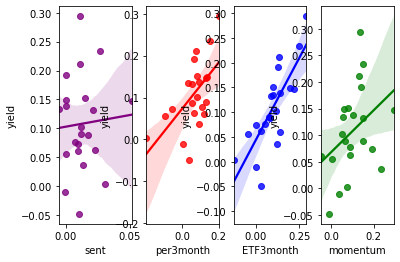

In [51]:
plt.subplot(1, 4, 1)
sns.regplot('sent', 'yield', MicrosoftResult, color='purple')
plt.subplot(1, 4, 2)
sns.regplot('per3month', 'yield', MicrosoftResult, color='red')
plt.subplot(1, 4, 3)
sns.regplot('ETF3month', 'yield', MicrosoftResult, color='blue')
plt.subplot(1, 4, 4)
sns.regplot('momentum', 'yield', MicrosoftResult, color='green')

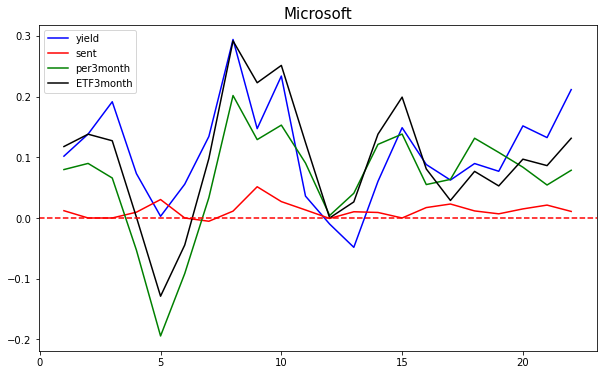

In [53]:
fig, ax = plt.subplots(figsize=(10,6))

ax.set_title('Microsoft', fontsize=15)
# ax.set_ylabel('ETF')
# ax.set_xlabel("Date Time")

ax.plot(MicrosoftResult['yield'],color='blue')
ax.plot(MicrosoftResult['sent'],color='red')
ax.plot(MicrosoftResult['per3month'],color='green')
ax.plot(MicrosoftResult['ETF3month'],color='black')
# ax.plot(MicrosoftResult['momentum'],color='purple')
ax.axhline(0,0,1,color='red',linestyle='--')
ax.legend(['yield','sent','per3month','ETF3month'],loc='upper left')
# ax.legend(['ETF ('+etf+')'],loc='upper left')

plt.show()

### Tesla

In [40]:
TeslaNew = pd.concat([Tesla.sent, TeslaR['yield'], SPY.per3month, TeslaETF.ETF3month], axis=1)
TeslaNew['momentum'] = TeslaNew['yield'].shift()
TeslaResult = TeslaNew.dropna()
TeslaResult['constant'] = 1

reg = sm.OLS(TeslaResult['yield'], TeslaResult[['constant','sent','per3month','momentum','ETF3month']]).fit()
reg.summary()

<ipython-input-40-4ecc8205ec3b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TeslaResult['constant'] = 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  yield   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     9.777
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           0.000271
Time:                        16:22:38   Log-Likelihood:                -3.6319
No. Observations:                  22   AIC:                             17.26
Df Residuals:                      17   BIC:                             22.72
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant       0.2925      0.148      1.976      0.065      -0.020       0.605
sent         -15.9933      6.792     -2.355      0.031     -30.323      -1.663
per3month     -6.3941      2.879     -2.221      0.040     -12.469      -0.319
momentum       0.2307      0.200      1.152      0.265      -0.192       0.653
ETF3month      8.2558      2.501      3.300      0.004       2.978      13.533
==============================================================================
Omnibus:                        0.476   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.788   Jarque-Bera (JB):                0.594
Skew:                           0.234   Prob(JB):                        0.743
Kurtosis:                       2.345   Cond. No.                         115.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
df=TeslaResult.corr()
df

,sent,yield,per3month,ETF3month,momentum,constant
sent,1.000000,-0.021673,-0.074591,0.114224,0.311746,NaN
yield,-0.021673,1.000000,0.310591,0.582106,0.527532,NaN
per3month,-0.074591,0.310591,1.000000,0.899007,-0.213475,NaN
ETF3month,0.114224,0.582106,0.899007,1.000000,0.119165,NaN
momentum,0.311746,0.527532,-0.213475,0.119165,1.000000,NaN
constant,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

<AxesSubplot:xlabel='momentum', ylabel='yield'>

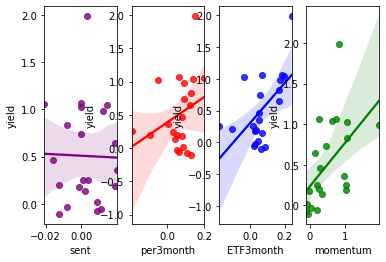

In [42]:
plt.subplot(1, 4, 1)
sns.regplot('sent', 'yield', TeslaResult, color='purple')
plt.subplot(1, 4, 2)
sns.regplot('per3month', 'yield', TeslaResult, color='red')
plt.subplot(1, 4, 3)
sns.regplot('ETF3month', 'yield', TeslaResult, color='blue')
plt.subplot(1, 4, 4)
sns.regplot('momentum', 'yield', TeslaResult, color='green')

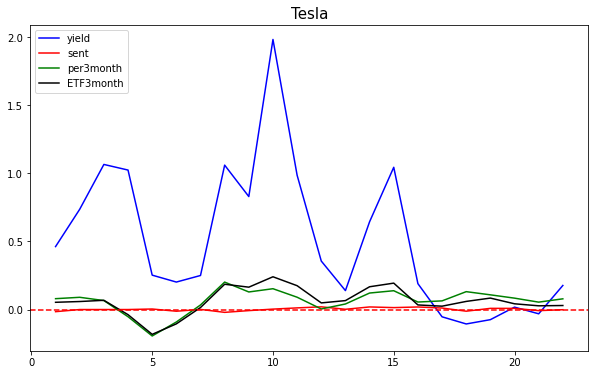

In [44]:
fig, ax = plt.subplots(figsize=(10,6))

ax.set_title('Tesla', fontsize=15)
# ax.set_ylabel('ETF')
# ax.set_xlabel("Date Time")

ax.plot(TeslaResult['yield'],color='blue')
ax.plot(TeslaResult['sent'],color='red')
ax.plot(TeslaResult['per3month'],color='green')
ax.plot(TeslaResult['ETF3month'],color='black')
# ax.plot(MicrosoftResult['momentum'],color='purple')
ax.axhline(0,0,1,color='red',linestyle='--')
ax.legend(['yield','sent','per3month','ETF3month'],loc='upper left')
# ax.legend(['ETF ('+etf+')'],loc='upper left')

plt.show()

### Amazon

In [45]:
AmazonNew = pd.concat([Amazon.sent, AmazonR['yield'], SPY.per3month, AmazonETF.ETF3month], axis=1)
AmazonNew['momentum'] = AmazonNew['yield'].shift()
AmazonResult = AmazonNew.dropna()
AmazonResult['constant'] = 1

reg = sm.OLS(AmazonResult['yield'], AmazonResult[['constant','sent','per3month','momentum','ETF3month']]).fit()
reg.summary()

<ipython-input-45-0b3f79ae87d6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AmazonResult['constant'] = 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  yield   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     5.290
Date:                Fri, 24 Sep 2021   Prob (F-statistic):            0.00591
Time:                        16:23:47   Log-Likelihood:                 21.161
No. Observations:                  22   AIC:                            -32.32
Df Residuals:                      17   BIC:                            -26.87
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant       0.0159      0.033      0.490      0.631      -0.053       0.085
sent          -0.9874      1.239     -0.797      0.436      -3.601       1.626
per3month     -0.1475      0.362     -0.407      0.689      -0.911       0.616
momentum       0.3713      0.209      1.779      0.093      -0.069       0.812
ETF3month      0.3188      0.178      1.794      0.091      -0.056       0.694
==============================================================================
Omnibus:                        1.267   Durbin-Watson:                   1.738
Prob(Omnibus):                  0.531   Jarque-Bera (JB):                0.890
Skew:                           0.132   Prob(JB):                        0.641
Kurtosis:                       2.051   Cond. No.                         56.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

<AxesSubplot:xlabel='momentum', ylabel='yield'>

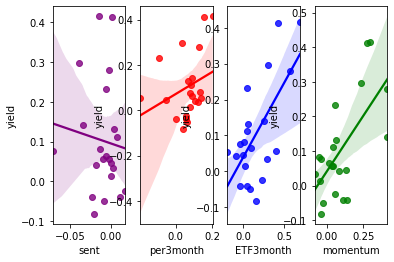

In [56]:
plt.subplot(1, 4, 1)
sns.regplot('sent', 'yield', AmazonResult, color='purple')
plt.subplot(1, 4, 2)
sns.regplot('per3month', 'yield', AmazonResult, color='red')
plt.subplot(1, 4, 3)
sns.regplot('ETF3month', 'yield', AmazonResult, color='blue')
plt.subplot(1, 4, 4)
sns.regplot('momentum', 'yield', AmazonResult, color='green')

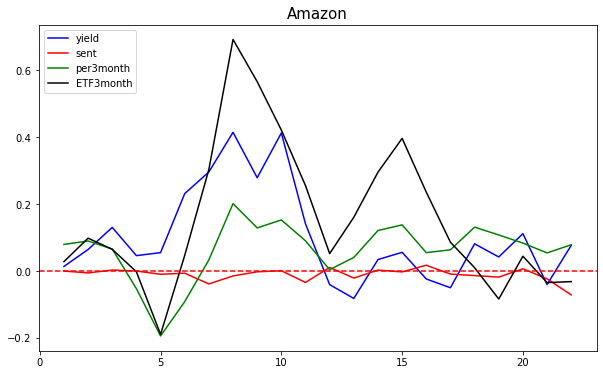

In [57]:
fig, ax = plt.subplots(figsize=(10,6))

ax.set_title('Amazon', fontsize=15)
# ax.set_ylabel('ETF')
# ax.set_xlabel("Date Time")

ax.plot(AmazonResult['yield'],color='blue')
ax.plot(AmazonResult['sent'],color='red')
ax.plot(AmazonResult['per3month'],color='green')
ax.plot(AmazonResult['ETF3month'],color='black')
# ax.plot(MicrosoftResult['momentum'],color='purple')
ax.axhline(0,0,1,color='red',linestyle='--')
ax.legend(['yield','sent','per3month','ETF3month'],loc='upper left')
# ax.legend(['ETF ('+etf+')'],loc='upper left')

plt.show()

### Nike

In [58]:
NikeNew = pd.concat([Nike.sent, NikeR['yield'], SPY.per3month, NikeETF.ETF3month], axis=1)
NikeNew['momentum'] = NikeNew['yield'].shift()
NikeResult = NikeNew.dropna()
NikeResult['constant'] = 1

reg = sm.OLS(NikeResult['yield'], NikeResult[['constant','sent','per3month','momentum','ETF3month']]).fit()
reg.summary()

<ipython-input-58-b1a6da081603>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NikeResult['constant'] = 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  yield   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     7.915
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           0.000857
Time:                        16:35:11   Log-Likelihood:                 27.415
No. Observations:                  22   AIC:                            -44.83
Df Residuals:                      17   BIC:                            -39.37
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant       0.0287      0.025      1.138      0.271      -0.024       0.082
sent          -1.6918      1.103     -1.534      0.143      -4.019       0.635
per3month      0.3423      0.467      0.732      0.474      -0.644       1.329
momentum       0.5513      0.172      3.197      0.005       0.187       0.915
ETF3month      0.1808      0.442      0.409      0.688      -0.752       1.114
==============================================================================
Omnibus:                        2.310   Durbin-Watson:                   1.421
Prob(Omnibus):                  0.315   Jarque-Bera (JB):                1.956
Skew:                           0.670   Prob(JB):                        0.376
Kurtosis:                       2.418   Cond. No.                         65.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

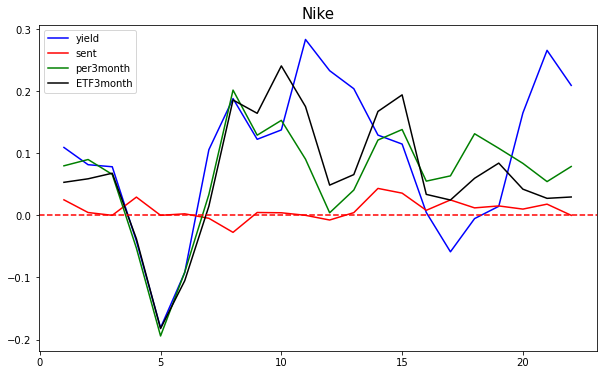

In [59]:
fig, ax = plt.subplots(figsize=(10,6))

ax.set_title('Nike', fontsize=15)
# ax.set_ylabel('ETF')
# ax.set_xlabel("Date Time")

ax.plot(NikeResult['yield'],color='blue')
ax.plot(NikeResult['sent'],color='red')
ax.plot(NikeResult['per3month'],color='green')
ax.plot(NikeResult['ETF3month'],color='black')
# ax.plot(MicrosoftResult['momentum'],color='purple')
ax.axhline(0,0,1,color='red',linestyle='--')
ax.legend(['yield','sent','per3month','ETF3month'],loc='upper left')
# ax.legend(['ETF ('+etf+')'],loc='upper left')

plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

<AxesSubplot:xlabel='momentum', ylabel='yield'>

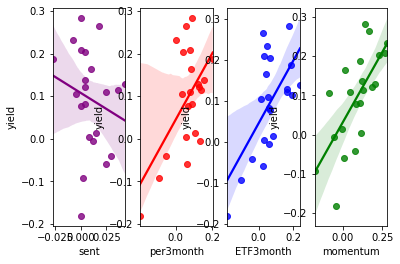

In [60]:
plt.subplot(1, 4, 1)
sns.regplot('sent', 'yield', NikeResult, color='purple')
plt.subplot(1, 4, 2)
sns.regplot('per3month', 'yield', NikeResult, color='red')
plt.subplot(1, 4, 3)
sns.regplot('ETF3month', 'yield', NikeResult, color='blue')
plt.subplot(1, 4, 4)
sns.regplot('momentum', 'yield', NikeResult, color='green')

### Pfizer

In [61]:
PfizerNew = pd.concat([Pfizer.sent, PfizerR['yield'], SPY.per3month, PfizerETF.ETF3month], axis=1)
PfizerNew['momentum'] = PfizerNew['yield'].shift()
PfizerResult = PfizerNew.dropna()
PfizerResult['constant'] = 1

reg = sm.OLS(PfizerResult['yield'], PfizerResult[['constant','sent','per3month','momentum','ETF3month']]).fit()
reg.summary()

<ipython-input-61-244f00ecd69d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PfizerResult['constant'] = 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  yield   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     1.725
Date:                Fri, 24 Sep 2021   Prob (F-statistic):              0.191
Time:                        16:35:29   Log-Likelihood:                 24.297
No. Observations:                  22   AIC:                            -38.59
Df Residuals:                      17   BIC:                            -33.14
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant      -0.0098      0.031     -0.321      0.752      -0.074       0.055
sent           2.0046      2.115      0.948      0.356      -2.457       6.466
per3month      0.5663      0.349      1.624      0.123      -0.169       1.302
momentum      -0.0767      0.269     -0.285      0.779      -0.644       0.491
ETF3month      0.0394      0.296      0.133      0.895      -0.585       0.663
==============================================================================
Omnibus:                        0.834   Durbin-Watson:                   1.547
Prob(Omnibus):                  0.659   Jarque-Bera (JB):                0.837
Skew:                          -0.314   Prob(JB):                        0.658
Kurtosis:                       2.280   Cond. No.                         109.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

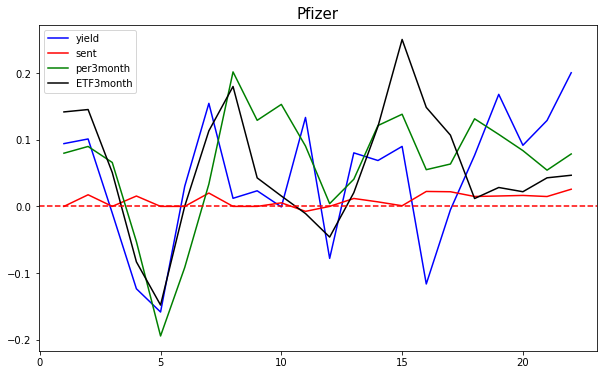

In [62]:
fig, ax = plt.subplots(figsize=(10,6))

ax.set_title('Pfizer', fontsize=15)

ax.plot(PfizerResult['yield'],color='blue')
ax.plot(PfizerResult['sent'],color='red')
ax.plot(PfizerResult['per3month'],color='green')
ax.plot(PfizerResult['ETF3month'],color='black')

ax.axhline(0,0,1,color='red',linestyle='--')

# ax.xticks()

ax.legend(['yield','sent','per3month','ETF3month'],loc='upper left')

plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

<AxesSubplot:xlabel='momentum', ylabel='yield'>

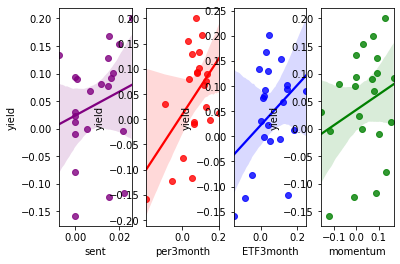

In [63]:
plt.subplot(1, 4, 1)
sns.regplot('sent', 'yield', PfizerResult, color='purple')
plt.subplot(1, 4, 2)
sns.regplot('per3month', 'yield', PfizerResult, color='red')
plt.subplot(1, 4, 3)
sns.regplot('ETF3month', 'yield', PfizerResult, color='blue')
plt.subplot(1, 4, 4)
sns.regplot('momentum', 'yield', PfizerResult, color='green')

### Facebook

In [64]:
FacebookNew = pd.concat([Facebook.sent, FacebookR['yield'], SPY.per3month, FacebookETF.ETF3month], axis=1)
FacebookNew['momentum'] = FacebookNew['yield'].shift()
FacebookResult = FacebookNew.dropna()
FacebookResult['constant'] = 1

reg = sm.OLS(FacebookResult['yield'], FacebookResult[['constant','sent','per3month','momentum','ETF3month']]).fit()
reg.summary()

<ipython-input-64-aed5a7d7a69f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FacebookResult['constant'] = 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  yield   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     8.756
Date:                Fri, 24 Sep 2021   Prob (F-statistic):           0.000500
Time:                        16:35:58   Log-Likelihood:                 25.376
No. Observations:                  22   AIC:                            -40.75
Df Residuals:                      17   BIC:                            -35.30
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant      -0.0100      0.033     -0.302      0.766      -0.080       0.060
sent          -0.3669      1.139     -0.322      0.751      -2.769       2.035
per3month     -0.7173      1.249     -0.574      0.573      -3.352       1.918
momentum       0.3355      0.162      2.065      0.055      -0.007       0.678
ETF3month      1.6473      1.264      1.303      0.210      -1.020       4.314
==============================================================================
Omnibus:                        0.941   Durbin-Watson:                   1.046
Prob(Omnibus):                  0.625   Jarque-Bera (JB):                0.636
Skew:                          -0.403   Prob(JB):                        0.727
Kurtosis:                       2.787   Cond. No.                         98.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

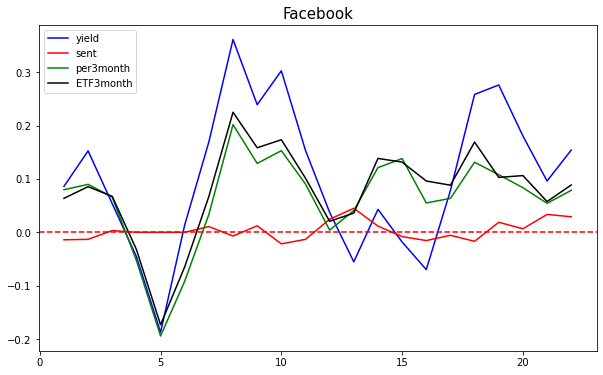

In [65]:
fig, ax = plt.subplots(figsize=(10,6))

ax.set_title('Facebook', fontsize=15)

ax.plot(FacebookResult['yield'],color='blue')
ax.plot(FacebookResult['sent'],color='red')
ax.plot(FacebookResult['per3month'],color='green')
ax.plot(FacebookResult['ETF3month'],color='black')

ax.axhline(0,0,1,color='red',linestyle='--')

# ax.xticks()

ax.legend(['yield','sent','per3month','ETF3month'],loc='upper left')

plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

<AxesSubplot:xlabel='momentum', ylabel='yield'>

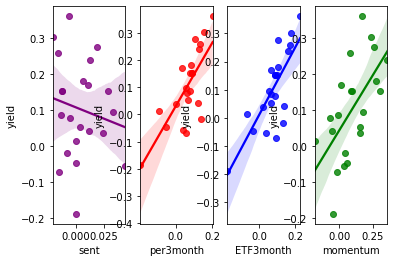

In [66]:
plt.subplot(1, 4, 1)
sns.regplot('sent', 'yield', FacebookResult, color='purple')
plt.subplot(1, 4, 2)
sns.regplot('per3month', 'yield', FacebookResult, color='red')
plt.subplot(1, 4, 3)
sns.regplot('ETF3month', 'yield', FacebookResult, color='blue')
plt.subplot(1, 4, 4)
sns.regplot('momentum', 'yield', FacebookResult, color='green')

### Walmart

In [67]:
WalmartNew = pd.concat([Walmart.sent, WalmartR['yield'], SPY.per3month, WalmartETF.ETF3month], axis=1)
WalmartNew['momentum'] = WalmartNew['yield'].shift()
WalmartResult = WalmartNew.dropna()
WalmartResult['constant'] = 1

reg = sm.OLS(WalmartResult['yield'], WalmartResult[['constant','sent','per3month','momentum','ETF3month']]).fit()
reg.summary()

<ipython-input-67-00390f2acfc7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WalmartResult['constant'] = 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  yield   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     7.595
Date:                Fri, 24 Sep 2021   Prob (F-statistic):            0.00106
Time:                        16:36:14   Log-Likelihood:                 36.970
No. Observations:                  22   AIC:                            -63.94
Df Residuals:                      17   BIC:                            -58.49
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant      -0.0066      0.017     -0.390      0.702      -0.042       0.029
sent           0.4292      0.919      0.467      0.646      -1.510       2.368
per3month     -0.6563      0.231     -2.837      0.011      -1.144      -0.168
momentum       0.4207      0.178      2.370      0.030       0.046       0.795
ETF3month      0.9950      0.246      4.045      0.001       0.476       1.514
==============================================================================
Omnibus:                        9.391   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                7.001
Skew:                          -1.194   Prob(JB):                       0.0302
Kurtosis:                       4.390   Cond. No.                         84.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

<AxesSubplot:xlabel='momentum', ylabel='yield'>

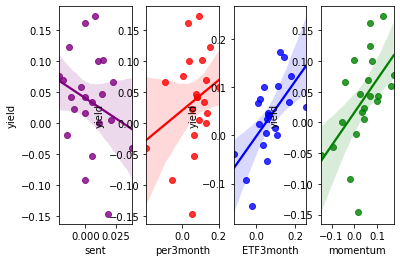

In [68]:
plt.subplot(1, 4, 1)
sns.regplot('sent', 'yield', WalmartResult, color='purple')
plt.subplot(1, 4, 2)
sns.regplot('per3month', 'yield', WalmartResult, color='red')
plt.subplot(1, 4, 3)
sns.regplot('ETF3month', 'yield', WalmartResult, color='blue')
plt.subplot(1, 4, 4)
sns.regplot('momentum', 'yield', WalmartResult, color='green')

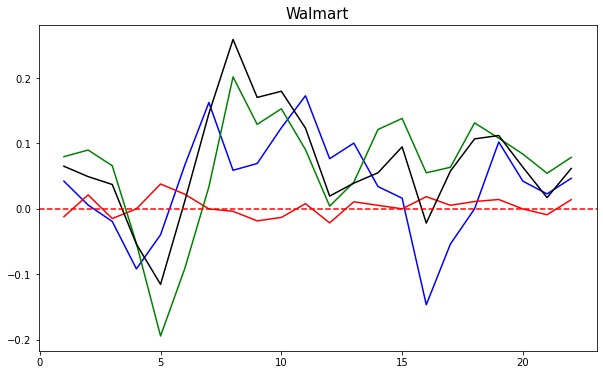

In [69]:
fig, ax = plt.subplots(figsize=(10,6))

ax.set_title('Walmart', fontsize=15)
# ax.set_ylabel('ETF')
# ax.set_xlabel("Date Time")

ax.plot(WalmartResult['yield'],color='blue')
ax.plot(WalmartResult['sent'],color='red')
ax.plot(WalmartResult['per3month'],color='green')
ax.plot(WalmartResult['ETF3month'],color='black')
# ax.plot(WalmartResult['momentum'],color='purple')
ax.axhline(0,0,1,color='red',linestyle='--')

# ax.legend(['ETF ('+etf+')'],loc='upper left')

plt.show()